# Tema 4: Modificar las zonas de salida

El detector de objetos necesita saber si un vehículo ya ha sido contado para no tomarlo en cuenta. Esto se logra con una máscara denominada zona de salida.

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

Se importa la imagen de ejemplo.

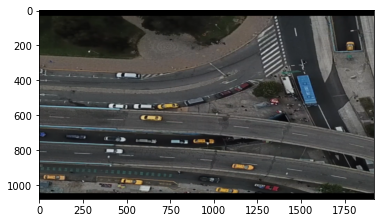

In [3]:
img = cv2.imread('imagenes/detectar-taxis.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)

Se extrae una zona de interés.

In [5]:
xr1 = 0
xr2 = 1200
yr1 = 300
yr2 = 1000
#zona de interés
roi = img[yr1:yr2,xr1:xr2]

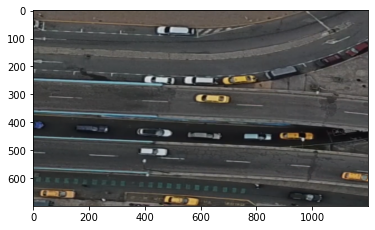

In [6]:
plt.imshow(roi)

Se obtienen las dimenasiones de la zona de interés.

In [13]:
height , width , layers =  roi.shape
SHAPE = (height,width)

Se puede contar los vehículos que van a la derecha colocando una zona de salida a ese lado. Si se quiere contar los vehículos que van en ambas direcciones, se puede colocar dos zonas de salida a cada lado.

Se crea la máscara de las mismas dimensiones que la zona de interés.

In [19]:
exit_mask = np.zeros(SHAPE + (3,), dtype='uint8')

Los puntos de salida sirven para dibujar los rectángulos que serán usados en la máscara para marcar la zona de salida. Vale la pena señalar que la primera tupla `(y,x)` señala la esquina superior izquierda del rectángulo y la segunda, la esquina inferior derecha.

In [20]:
EXIT_PTS = [[(SHAPE[1]//4*3,0),(SHAPE[1],SHAPE[0])]]

Se dibujan los rectángulos sobre la máscara.

In [21]:
for rectangles in EXIT_PTS:
    cv2.rectangle(exit_mask, rectangles[0], rectangles[1], (255,255,255), -1)

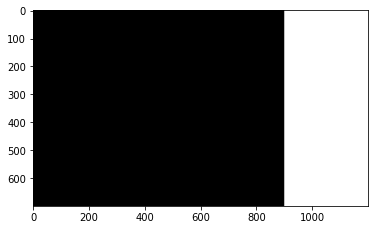

In [22]:
plt.imshow(exit_mask)

La máscara generada en esta ocasión se puede utilizar para contar vehículos que van a la derecha. Cuando un vehículo entra al área blanca de la máscara, se cuenta y se clasifica.

## Función principal

In [ ]:
#se envía la ubicación del vehículo y se pregunta si está o no en la zona de salida
def check_exit(point, exit_masks):
    for exit_mask in exit_masks:
        try:
            # (y,x)
            if exit_mask[point[1]][point[0]][0] == 255:
                return True
        except:
            return True
    return False

En el archivo [main.py](../main.py) existe una función que verifica si un vehículo se encuentra en la zona de salida. La zona blanca de la máscara mostrada arriba tiene como valor 255, así se verifica si un vehículo ha salido y puede ser contado.